# What is feature extraction?
Feature selection is the process of reducing the number of input variables when developing a predictive model.


Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

*Some predictive modeling problems have a large number of variables that can slow the development and training of models and require a large amount of system memory. Additionally, the performance of some models can degrade when including input variables that are not relevant to the target variable.*

There are two main types of feature selection techniques: supervised and unsupervised, and supervised methods may be divided into wrapper, filter and intrinsic.

There are two types of features :

- **Useful features**: they provide more information and helps make our model more accurate.


- **Useless features** : they don’t provide any useful information and might even deteriorate our model (They can be non helpful, false or duplicates).

Selecting the right features is a crucial step to obtain an accurate model.

There are three main feature selection families :

- **Filter methods** : based on statistical tests. Filter-based feature selection methods use statistical measures to score the correlation or dependence between input variables that can be filtered to choose the most relevant features.

- **Wrapper methods** : generate all the possible combinations and create a model for each one and keep the best.


- **Embedded methods** : integrate the feature selection in the training process.

<center><img scr="https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png" width="400">
</center>


## 1. Filter method

### Numerical Input, Numerical Output

This is a regression predictive modeling problem with numerical input variables.

The most common techniques are to use a correlation coefficient, such as Pearson’s for a linear correlation, or rank-based methods for a nonlinear correlation.

- Pearson’s correlation coefficient (linear)

- Spearman’s rank coefficient (nonlinear)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

We're gonna use the housing dataset of California.

In [51]:
df_housing = pd.read_csv('data/housing.csv')

In [52]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [53]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [62]:
df_housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [63]:
cols = list(df_housing.columns)
cols.remove('ocean_proximity')

We have to remove categorical values. We could have changed that to a category with associations but let's just remove it.

In [64]:
df_numerical = df_housing[cols]

In [65]:
df_numerical.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.


For example, two variables which are linearly dependent (say, $x$ and $y$ which depend on each other as $x = 2y$) will have a higher correlation than two variables which are non-linearly dependent (say, $u$ and $v$ which depend on each other as $u = v2$)

In [66]:
corr = df_numerical.corr()

<AxesSubplot:>

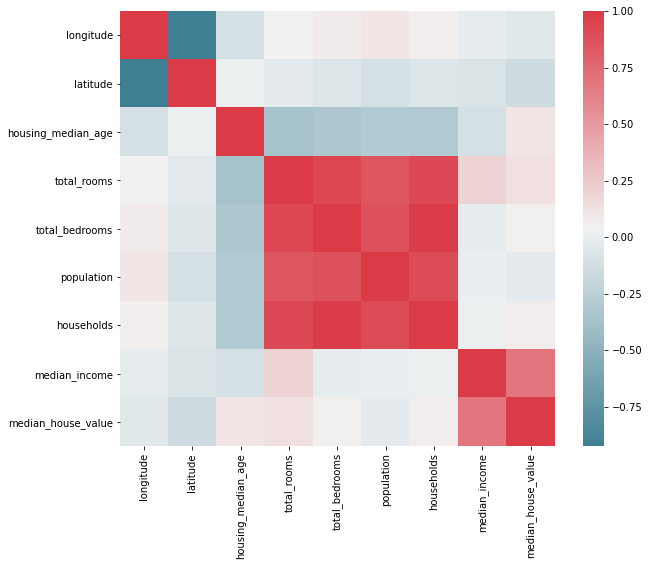

In [67]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,ax=ax)

In [69]:
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

In our case, we can drop ``total_rooms`` and ``total_bedrooms`` for example.

### Numerical Input, Categorical Output
This is a classification predictive modeling problem with numerical input variables.

This might be the most common example of a classification problem,

Again, the most common techniques are correlation based, although in this case, they must take the categorical target into account.

- ANOVA correlation coefficient (linear).
- Kendall’s rank coefficient (nonlinear).

Kendall does assume that the categorical variable is ordinal.

In [70]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [71]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [72]:
# First, we need to specify the dependant variable and the independant ones
X = df_housing[cols]
y = df_housing['ocean_proximity']


In [73]:
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [74]:
# Let's replace the missing values by the mean of that column
X = X.fillna(X.mean())

Let's call our feature selector. The ``score_func=f_classif`` computes the ANOVA F-value.

In [75]:
feature_selector = SelectKBest(score_func=f_classif,k='all')

Then, we have to fit the selector to the data so it can learn the relationship between them.

In [76]:
feature_selector.fit(X,y)

SelectKBest(k='all')

In [77]:
feature_selector.scores_

array([1827.9884879 , 2572.84562964,  560.20235918,    5.44930669,
          2.99745439,   38.00245503,   11.57609269,  317.2904522 ,
       1612.14073588])

In [78]:
for i in range(len(feature_selector.scores_)):
	print('Feature %d: %f' % (i, feature_selector.scores_[i]))

Feature 0: 1827.988488
Feature 1: 2572.845630
Feature 2: 560.202359
Feature 3: 5.449307
Feature 4: 2.997454
Feature 5: 38.002455
Feature 6: 11.576093
Feature 7: 317.290452
Feature 8: 1612.140736


<BarContainer object of 9 artists>

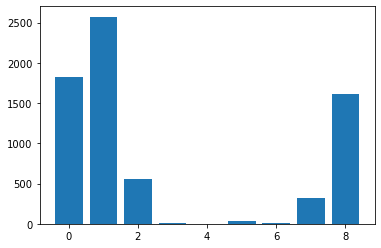

In [79]:
plt.bar([i for i in range(len(feature_selector.scores_))],feature_selector.scores_)

Feature 0, 1 and 8 have more impact on our target variable.

### Categorical Input, Categorical Output
This is a classification predictive modeling problem with categorical input variables.

The most common correlation measure for categorical data is the chi-squared test. You can also use mutual information (information gain) from the field of information theory.

- Chi-Squared test (contingency tables).
- Mutual Information.
In fact, mutual information is a powerful method that may prove useful for both categorical and numerical data, e.g. it is agnostic to the data types.

For this case, we'll be using the titanic dataset.

In [80]:
df_titanic = pd.read_csv('data/titanic.csv')

In [81]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
# Target variable is "Survived". We gonna remove the "Name" variable since it's irrelevant.
cols = list(df_titanic.columns)
cols.remove('Survived')
cols.remove('Name')
cols.remove('Embarked')
cols.remove('Cabin')
cols.remove('Ticket')

In [83]:
X = df_titanic[cols]
y = df_titanic['Survived']

In [84]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,male,22.0,1,0,7.2500
1,2,1,female,38.0,1,0,71.2833
2,3,3,female,26.0,0,0,7.9250
3,4,1,female,35.0,1,0,53.1000
4,5,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000
887,888,1,female,19.0,0,0,30.0000
888,889,3,female,NaN,1,2,23.4500
889,890,1,male,26.0,0,0,30.0000


Let's use Hot Code Encoding for ``Sex`` column.

In [85]:
X = pd.get_dummies(X,columns=['Sex'])

In [86]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,1,3,22.0,1,0,7.2500,0,1
1,2,1,38.0,1,0,71.2833,1,0
2,3,3,26.0,0,0,7.9250,1,0
3,4,1,35.0,1,0,53.1000,1,0
4,5,3,35.0,0,0,8.0500,0,1


The ``Sex`` column got replaced by two different column. We can drop one and keep the other.

In [87]:
X.drop("Sex_male",axis=1,inplace=True)

In [88]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female
0,1,3,22.0,1,0,7.2500,0
1,2,1,38.0,1,0,71.2833,1
2,3,3,26.0,0,0,7.9250,1
3,4,1,35.0,1,0,53.1000,1
4,5,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0
887,888,1,19.0,0,0,30.0000,1
888,889,3,NaN,1,2,23.4500,1
889,890,1,26.0,0,0,30.0000,0


In [89]:
X.rename(columns={'Sex_female' :'Sex'},inplace=True)

In [90]:
X
# Sex : 0 -> Man
#Sex : 1 -> Woman

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex
0,1,3,22.0,1,0,7.2500,0
1,2,1,38.0,1,0,71.2833,1
2,3,3,26.0,0,0,7.9250,1
3,4,1,35.0,1,0,53.1000,1
4,5,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0
887,888,1,19.0,0,0,30.0000,1
888,889,3,NaN,1,2,23.4500,1
889,890,1,26.0,0,0,30.0000,0


Let's make sure not to have NaN values in our features.

In [91]:
X.isna().sum()

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex              0
dtype: int64

In [92]:
X = X.fillna(X.mean())

In [93]:
from sklearn.feature_selection import chi2

test = chi2(X,y)

In [94]:
test

(array([3.31293407e+00, 3.08736994e+01, 2.46879258e+01, 2.58186538e+00,
        1.00974991e+01, 4.51831909e+03, 1.70348127e+02]),
 array([6.87366651e-02, 2.75378563e-08, 6.74051416e-07, 1.08094210e-01,
        1.48470676e-03, 0.00000000e+00, 6.21058490e-39]))

In [95]:
def describe_chi2(results,alpha=0.5):
  for e in range(len(results)):
    if results[e] <= alpha and results[e] > 0:
      print('We cannot conclude that the feature {} is statistically associated with the target.'.format(e))
    else:
      print('The feature {} is statistically associated with the target.'.format(e))

In [96]:
describe_chi2(test[0])

The feature 0 is statistically associated with the target.
The feature 1 is statistically associated with the target.
The feature 2 is statistically associated with the target.
The feature 3 is statistically associated with the target.
The feature 4 is statistically associated with the target.
The feature 5 is statistically associated with the target.
The feature 6 is statistically associated with the target.


## 2. Wrapper method

Another way to consider the mechanism used to select features which may be divided into wrapper and filter methods. These methods are almost always supervised and are evaluated based on the performance of a resulting model on a hold out dataset.

Wrapper feature selection methods create many models with different subsets of input features and select those features that result in the best performing model according to a performance metric. These methods are unconcerned with the variable types, although they can be computationally expensive. RFE is a good example of a wrapper feature selection method.

# 📐 Feature Extraction Practice

What is the type of the input and output variables?

What is the most suited method for feature selection for these types of variables?

In [97]:
df_diabetes = pd.read_csv('data/diabetes.csv')

In [98]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The input and output variables are both numerical.

The best suited method for feature selection is Pearson's correlation matrix.

In [100]:
corr_diabetes = df_diabetes.corr()

<AxesSubplot:>

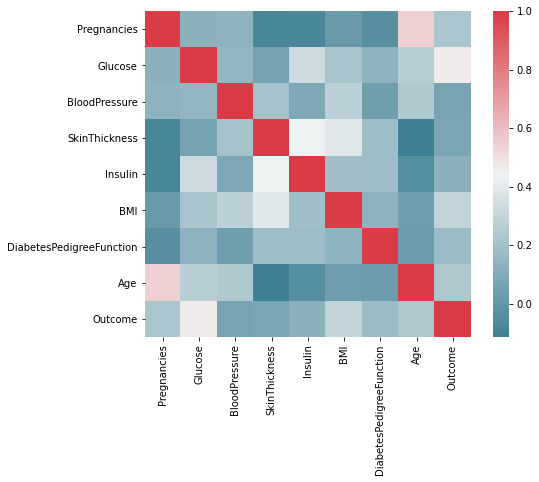

In [102]:
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_diabetes, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,ax=ax)

In [109]:
corr_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9.

In [116]:
columns = np.full((corr_diabetes.shape[0],), True, dtype=bool)
for i in range(corr_diabetes.shape[0]):
    for j in range(i+1, corr_diabetes.shape[0]):
        if corr_diabetes.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [117]:
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [118]:
selected_columns = df_diabetes.columns[columns]

In [119]:
new_df_diabeted = df_diabetes[selected_columns]
new_df_diabeted.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In our case, we do not have features that are strongly correlated. So we won't drop any of them.

# DIMENSIONALITY REDUCTION
The goal is similar to feature selection, we try to have fewer features to use in our model.

We obtain a few features by transforming our initial features into a lower
dimension.

This process is a tradeoff between information kept and the number of
dimensions kept.

There are many techniques for dimensionality reduction, we saw :
- **Principal component analysis (PCA)** : We create new features from
linear combinations of our initial features, each new feature explains
the variance not yet explained until we have a good balance between
information and the number of features.


- **Correspondence analysis (CA)**: It is the same as PCA but it is applied for
contingency tables which are tables that illustrate the frequency
distributions of some variables.